In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import lightgbm as lgb
from sklearn.metrics import roc_auc_score



In [10]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test_x.csv')

In [13]:
train_df.shape

(45532, 78)

In [11]:
train_df.head()

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,age_group,education,engnat,familysize,gender,hand,married,race,religion,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,voted,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
0,0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,1577,5.0,539,2.0,586,4.0,1095,5.0,1142,4.0,1287,4.0,883,4.0,851,2.0,851,5.0,816,2.0,579,2.0,924,2.0,366,2.0,876,2.0,633,1.0,1115,30s,2,1,4,Female,1,3,White,Other,2,2,2,1,2,1,7,4,4,3,1,2,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1
1,1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,4320,3.0,2190,1.0,826,1.0,4082,5.0,1867,3.0,1264,5.0,2943,4.0,3927,1.0,4329,5.0,1828,1.0,1214,5.0,2414,5.0,1356,1.0,3039,4.0,4304,1.0,1346,20s,4,2,3,Female,1,1,Asian,Hindu,1,1,0,0,1,2,3,4,0,4,3,2,0,0,0,0,1,0,1,1,0,1,1,0,1,0,1,1
2,2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,1333,1.0,531,4.0,1167,1.0,1016,3.0,2653,2.0,1569,5.0,998,5.0,2547,2.0,918,4.0,2153,2.0,1304,1.0,1131,5.0,937,4.0,1327,1.0,1170,1.0,1409,30s,3,1,3,Male,1,2,White,Other,2,3,1,5,3,4,2,6,1,3,2,1,0,0,1,1,1,0,1,1,0,1,1,1,1,0,1,1
3,3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,357,2.0,1519,4.0,159,3.0,2275,5.0,2809,4.0,5614,3.0,3219,4.0,1296,4.0,9046,4.0,1216,4.0,1169,4.0,23868,3.0,581,4.0,8830,4.0,2392,5.0,1312,20s,4,2,0,Female,1,1,Asian,Hindu,2,4,1,1,1,3,1,3,1,3,3,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1
4,4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,1014,2.0,628,1.0,991,1.0,1259,5.0,1153,5.0,1388,5.0,740,5.0,1181,4.0,547,2.0,575,1.0,754,4.0,1140,5.0,323,5.0,1070,1.0,583,2.0,1889,20s,3,1,2,Male,1,2,White,Agnostic,1,1,1,6,0,2,0,6,2,6,1,1,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,1


In [12]:
train_df.describe()

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,education,engnat,familysize,hand,married,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,voted,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
count,45532.000000,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,45532.000000,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,45532.000000,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,45532.000000,4.553200e+04,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000
mean,22765.500000,2.129535,9.453570e+02,2.904463,2.189589e+03,3.662347,1484.294518,1.749078,1.490672e+03,2.317952,1.899292e+03,2.168145,1.850650e+03,2.560595,1.284608e+03,2.317952,4.584272e+03,3.157691,4.068434e+03,3.575529,2.576363e+03,3.813933,2.038986e+03,4.325727,3.741018e+03,3.509620,2.050287e+03,2.632896,959.880502,3.217232,1.435762e+03,3.071752,1.633479e+03,2.840464,1.154352e+03,2.823487,2.470808e+03,3.432948,1.164117e+03,3.225687,2.240057e+03,2.544474,1.271326,4.716689e+04,1.170715,1.387112,3.017241,2.621189,1.768712,3.041246,1.335918,2.472217,2.031099,3.507226,2.277497,4.317996,2.180401,1.546824,0.079592,0.163665,0.118356,0.709721,0.934793,0.208974,0.868708,0.895722,0.328538,0.938900,0.972195,0.202824,0.946104,0.395195,0.947729,0.927040
std,13144.100565,1.196952,1.307565e+04,1.566142,3.351027e+04,1.431494,8977.664318,1.043625,1.092260e+04,1.369205,1.670765e+04,1.348653,7.608236e+04,1.510600,9.756584e+03,1.460813,5.020265e+05,1.481740,1.141738e+05,1.361220,5.411432e+04,1.372551,3.069164e+04,1.146992,3.663672e+05,1.375134,7.530787e+04,1.473022,5869.964127,1.476414,1.084997e+04,1.489744,2.600221e+04,1.404342,2.250689e+04,1.424383,1.482890e+05,1.374938,7.433515e+03,1.521603,6.730924e+04,0.941328,0.448436,1.006402e+07,0.468883,0.639987,2.007713,1.897081,1.685069,2.037278,1.452544,2.000658,1.785824,1.971456,1.848783,1.722793,0.762647,0.497808,0.270664,0.369975,0.323033,0.453896,0.246893,0.406580,0.337723,0.305625,0.469687,0.239516,0.164414,0.402107,0.225815,0.488898,0.222575,0.260073
min,0.000000,1.000000,2.500000e+01,1.000000,2.500000e+01,1.000000,25.000000,1.000000,2.600000e+01,1.000000,2.500000e+01,1.000000,2.500000e+01,1.000000,2.500000e+01,1.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,2.500000e+01,1.000000,2.500000e+01,1.000000,25.000000,1.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,2.500000e+01,1.000000,2.500000e+01,1.000000,2.500000e+01,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11382.750000,1.000000,4.040000e+02,1.000000,8.750000e+02,2.000000,651.000000,1.000000,6.790000e+02,1.000000,8.340000e+02,1.000000,5.040000e+02,1.000000,5.490000e+02,1.000000,1.077000e+03,2.000000,1.259000e+03,2.000000,9.020000e+02,3.000000,8.590000e+02,4.000000,8.060000e+02,2.000000,6.500000e+02,1.000000,428.000000,2.000000,6.380000e+02,2.000000,7.060000e+02,2.000000,4.610000e+02,2.000000,7.940000e+

In [1974]:
train_df.columns

Index(['index', 'QaA', 'QaE', 'QbA', 'QbE', 'QcA', 'QcE', 'QdA', 'QdE', 'QeA',
       'QeE', 'QfA', 'QfE', 'QgA', 'QgE', 'QhA', 'QhE', 'QiA', 'QiE', 'QjA',
       'QjE', 'QkA', 'QkE', 'QlA', 'QlE', 'QmA', 'QmE', 'QnA', 'QnE', 'QoA',
       'QoE', 'QpA', 'QpE', 'QqA', 'QqE', 'QrA', 'QrE', 'QsA', 'QsE', 'QtA',
       'QtE', 'age_group', 'education', 'engnat', 'familysize', 'gender',
       'hand', 'married', 'race', 'religion', 'tp01', 'tp02', 'tp03', 'tp04',
       'tp05', 'tp06', 'tp07', 'tp08', 'tp09', 'tp10', 'urban', 'voted',
       'wf_01', 'wf_02', 'wf_03', 'wr_01', 'wr_02', 'wr_03', 'wr_04', 'wr_05',
       'wr_06', 'wr_07', 'wr_08', 'wr_09', 'wr_10', 'wr_11', 'wr_12', 'wr_13'],
      dtype='object')

In [1975]:
test_df.head()

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,...,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
0,0,3.0,736,2.0,2941,3.0,4621,1.0,4857,2.0,...,0,1,0,0,1,0,1,0,1,1
1,1,3.0,514,2.0,1952,3.0,1552,3.0,821,4.0,...,0,0,0,0,0,0,0,0,0,0
2,2,3.0,500,2.0,2507,4.0,480,2.0,614,2.0,...,0,1,0,1,1,0,1,0,1,1
3,3,1.0,669,1.0,1050,5.0,1435,2.0,2252,5.0,...,1,1,1,1,1,1,1,1,1,1
4,4,2.0,499,1.0,1243,5.0,845,2.0,1666,2.0,...,1,1,0,1,1,0,1,1,1,1


In [1976]:
train_df['voted'].value_counts()

2    24898
1    20634
Name: voted, dtype: int64

In [1977]:
train_df.isnull().sum() / len(train_df)

index    0.0
QaA      0.0
QaE      0.0
QbA      0.0
QbE      0.0
        ... 
wr_09    0.0
wr_10    0.0
wr_11    0.0
wr_12    0.0
wr_13    0.0
Length: 78, dtype: float64

In [1978]:
train_df['QaE'].describe()

count    4.553200e+04
mean     9.453570e+02
std      1.307565e+04
min      2.500000e+01
25%      4.040000e+02
50%      5.570000e+02
75%      8.270000e+02
max      2.413960e+06
Name: QaE, dtype: float64

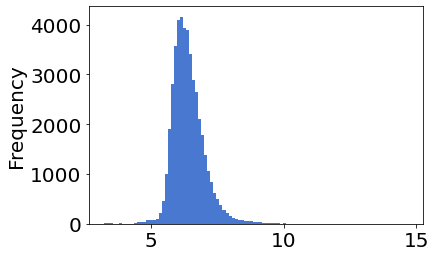

In [1979]:
log(train_df['QaE']).plot.hist(bins=100)

In [1980]:
train_df

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,...,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
0,0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,...,0,1,0,1,1,0,1,0,1,1
1,1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,...,1,1,0,1,1,0,1,0,1,1
2,2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,...,1,1,0,1,1,1,1,0,1,1
3,3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,...,0,0,0,0,1,0,1,0,1,1
4,4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,...,1,1,1,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45527,45527,2.0,1050,5.0,619,4.0,328,1.0,285,1.0,...,1,1,0,1,1,1,1,0,1,1
45528,45528,2.0,581,3.0,1353,4.0,1164,1.0,798,3.0,...,1,1,0,1,1,1,1,0,1,1
45529,45529,4.0,593,1.0,857,1.0,1047,4.0,1515,5.0,...,1,1,0,1,1,0,1,0,1,1
45530,45530,1.0,747,3.0,1331,4.0,892,2.0,1281,1.0,...,1,1,0,1,1,1,1,0,1,1


In [1981]:
train_df['voted'].value_counts()

2    24898
1    20634
Name: voted, dtype: int64

# Q_E

In [1751]:
qe_list = ['Q{}E'.format(chr(ch)) for ch in range(ord('a'), ord('u'))]

In [1752]:
qe_list

['QaE',
 'QbE',
 'QcE',
 'QdE',
 'QeE',
 'QfE',
 'QgE',
 'QhE',
 'QiE',
 'QjE',
 'QkE',
 'QlE',
 'QmE',
 'QnE',
 'QoE',
 'QpE',
 'QqE',
 'QrE',
 'QsE',
 'QtE']

In [1753]:
train_df[qe_list].describe()

,QaE,QbE,QcE,QdE,QeE,QfE,QgE,QhE,QiE,QjE,QkE,QlE,QmE,QnE,QoE,QpE,QqE,QrE,QsE,QtE
count,4.553200e+04,4.553200e+04,45532.000000,4.553200e+04,4.553200e+04,4.553200e+04,4.553200e+04,4.553200e+04,4.553200e+04,4.553200e+04,4.553200e+04,4.553200e+04,4.553200e+04,45532.000000,4.553200e+04,4.553200e+04,4.553200e+04,4.553200e+04,4.553200e+04,4.553200e+04
mean,9.453570e+02,2.189589e+03,1484.294518,1.490672e+03,1.899292e+03,1.850650e+03,1.284608e+03,4.584272e+03,4.068434e+03,2.576363e+03,2.038986e+03,3.741018e+03,2.050287e+03,959.880502,1.435762e+03,1.633479e+03,1.154352e+03,2.470808e+03,1.164117e+03,2.240057e+03
std,1.307565e+04,3.351027e+04,8977.664318,1.092260e+04,1.670765e+04,7.608236e+04,9.756584e+03,5.020265e+05,1.141738e+05,5.411432e+04,3.069164e+04,3.663672e+05,7.530787e+04,5869.964127,1.084997e+04,2.600221e+04,2.250689e+04,1.482890e+05,7.433515e+03,6.730924e+04
min,2.500000e+01,2.500000e+01,25.000000,2.600000e+01,2.500000e+01,2.500000e+01,2.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.500000e+01,2.500000e+01,25.000000,0.000000e+00,0.000000e+00,0.000000e+00,2.500000e+01,2.500000e+01,2.500000e+01
25%,4.040000e+02,8.750000e+02,651.000000,6.790000e+02,8.340000e+02,5.040000e+02,5.490000e+02,1.077000e+03,1.259000e+03,9.020000e+02,8.590000e+02,8.060000e+02,6.500000e+02,428.000000,6.380000e+02,7.060000e+02,4.610000e+02,7.940000e+02,5.270000e+02,7.330000e+02
50%,5.570000e+02,1.218000e+03,899.000000,9.310000e+02,1.154000e+03,7.120000e+02,7.720000e+02,1.464000e+03,1.800000e+03,1.260000e+03,1.178000e+03,1.125000e+03,9.060000e+02,596.000000,8.830000e+02,9.700000e+02,6.520000e+02,1.117000e+03,7.470000e+02,1.020000e+03
75%,8.270000e+02,1.838000e+03,1335.000000,1.355000e+03,1.656000e+03,1.078000e+03,1.150000e+03,2.090000e+03,2.761000e+03,1.899000e+03,1.721000e+03,1.649000e+03,1.342000e+03,891.000000,1.300000e+03,1.409000e+03,9.820000e+02,1.664000e+03,1.124000e+03,1.526000e+03
max,2.413960e+06,5.580395e+06,871557.000000,1.552821e+06,1.919926e+06,1.176370e+07,1.068252e+06,1.070860e+08,1.703586e+07,9.910006e+06,4.824953e+06,7.754351e+07,1.410832e+07,606694.000000,1.309739e+06,4.650742e+06,4.277510e+06,3.159328e+07,1.286581e+06,1.155650e+07


In [1754]:
train_df[qe_list] = log(train_df[qe_list]) / 7
test_df[qe_list] = log(test_df[qe_list]) / 7

/Users/jeongsuchan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/Users/jeongsuchan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


In [1755]:
train_df[qe_list]

,QaE,QbE,QcE,QdE,QeE,QfE,QgE,QhE,QiE,QjE,QkE,QlE,QmE,QnE,QoE,QpE,QqE,QrE,QsE,QtE
0,0.842058,1.031795,0.986393,0.990210,1.051897,0.898531,0.910474,0.999787,1.005791,1.022867,0.969046,0.963773,0.963773,0.957773,0.908757,0.975530,0.843233,0.967909,0.921496,1.002373
1,0.924621,1.025724,1.161100,1.142283,1.195859,1.098808,0.959514,1.187763,1.076013,1.020291,1.141026,1.182233,1.196156,1.072997,1.014525,1.112720,1.030328,1.145612,1.195329,1.029270
2,1.056005,1.042828,0.989791,1.160551,1.027884,0.896395,1.008885,0.989090,1.126207,1.051171,0.986536,1.120382,0.974600,1.096374,1.024742,1.004408,0.977526,1.027239,1.009251,1.035805
3,0.888939,1.106491,0.985675,1.154982,0.839677,1.046544,0.724129,1.104248,1.134369,1.233288,1.153832,1.023863,1.301440,1.014760,1.009129,1.440042,0.909250,1.297987,1.111412,1.025615
4,0.975993,0.937290,0.902967,0.995416,0.988808,0.920363,0.985531,1.019725,1.007160,1.033660,0.943807,1.010588,0.900636,0.907767,0.946485,1.005541,0.825379,0.996488,0.909741,1.077686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45527,0.993792,0.918301,0.827573,0.807498,0.914322,0.798178,0.821796,0.882860,0.989090,0.803946,0.916442,0.767234,0.851572,0.814349,1.079639,0.869214,0.958994,0.819049,0.910474,1.102796
45528,0.909250,1.030011,1.008517,0.954587,1.060936,0.903991,0.923067,1.036412,1.201500,1.034071,1.116458,1.020742,0.962424,1.034992,1.047013,0.939694,0.946485,1.002757,0.926158,1.012511
45529,0.912171,0.964777,0.993383,1.046167,1.061783,1.019042,0.999657,1.022422,1.100042,1.067906,0.995416,1.043694,1.079116,0.970335,1.024083,1.012868,0.879871,1.069115,1.030222,0.928970
45530,0.945152,1.027669,0.970495,1.022199,1.027347,0.913609,0.925282,1.037819,1.066604,0.949484,0.990350,0.944193,1.191152,0.937290,0.884623,0.973819,1.024413,1.060936,0.943227,1.003521


In [1756]:
train_df = train_df.replace(-np.inf, 0)
test_df = test_df.replace(-np.inf, 0)

# Q_A

In [1757]:
qa_list = ['Q{}A'.format(chr(ch)) for ch in range(ord('a'), ord('u'))]

In [1758]:
train_df[qa_list] = train_df[qa_list]/5
test_df[qa_list] = test_df[qa_list]/5

In [1759]:
train_df[qa_list]

,QaA,QbA,QcA,QdA,QeA,QfA,QgA,QhA,QiA,QjA,QkA,QlA,QmA,QnA,QoA,QpA,QqA,QrA,QsA,QtA
0,0.6,0.8,1.0,0.2,0.4,1.0,0.4,0.8,1.0,0.8,0.8,0.8,0.4,1.0,0.4,0.4,0.4,0.4,0.4,0.2
1,1.0,1.0,0.6,1.0,0.2,0.6,0.2,0.2,1.0,0.6,1.0,0.8,0.2,1.0,0.2,1.0,1.0,0.2,0.8,0.2
2,0.8,0.2,0.2,0.8,1.0,0.2,0.8,0.2,0.6,0.4,1.0,1.0,0.4,0.8,0.4,0.2,1.0,0.8,0.2,0.2
3,0.6,0.6,0.8,0.6,0.2,0.4,0.8,0.6,1.0,0.8,0.6,0.8,0.8,0.8,0.8,0.8,0.6,0.8,0.8,1.0
4,0.2,0.2,1.0,0.4,0.2,0.4,0.2,0.2,1.0,1.0,1.0,1.0,0.8,0.4,0.2,0.8,1.0,1.0,0.2,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45527,0.4,1.0,0.8,0.2,0.2,0.2,0.2,0.2,0.2,0.8,0.8,1.0,0.8,0.2,0.4,0.8,0.4,0.2,1.0,0.8
45528,0.4,0.6,0.8,0.2,0.6,0.4,0.4,0.2,0.4,1.0,0.4,1.0,0.6,0.4,0.8,0.8,0.4,0.6,0.8,0.8
45529,0.8,0.2,0.2,0.8,1.0,0.8,1.0,0.2,1.0,0.2,1.0,1.0,0.2,0.8,0.2,0.2,1.0,1.0,0.6,0.2
45530,0.2,0.6,0.8,0.4,0.2,0.2,0.2,0.2,1.0,0.2,1.0,1.0,0.8,0.6,0.2,0.2,0.8,0.8,0.8,0.2


# age_group

In [1982]:
list(set(train_df['age_group'].to_list()))

['10s', '40s', '+70s', '60s', '50s', '20s', '30s']

In [1983]:
train_df['age'] = train_df['age_group'].map({'10s':1, '20s':2, '30s':3, '40s':4, '50s': 5, '60s':6, '+70s':6})
test_df['age'] = test_df['age_group'].map({'10s':1, '20s':2, '30s':3, '40s':4, '50s': 5, '60s':6, '+70s':6})

In [1984]:
train_df[train_df['voted'] == 1]['age_group'].value_counts().sort_index()

+70s     173
10s     2314
20s     7484
30s     4614
40s     3243
50s     1936
60s      870
Name: age_group, dtype: int64

In [1985]:
(train_df[train_df['voted'] == 1]['age_group'].value_counts() / train_df['age_group'].value_counts()).sort_values()

10s     0.162786
20s     0.530329
30s     0.588821
40s     0.642051
50s     0.670128
60s     0.728643
+70s    0.736170
Name: age_group, dtype: float64

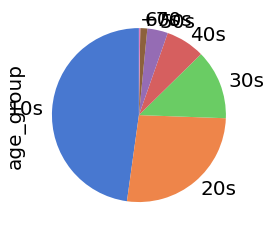

In [1986]:
train_df[train_df['voted'] == 2]['age_group'].value_counts().plot.pie(y='voted', startangle=90)
plt.show()

In [1987]:
(train_df[train_df['voted'] == 2]['age_group'].value_counts() / train_df['age_group'].value_counts())

10s     0.837214
20s     0.469671
30s     0.411179
40s     0.357949
50s     0.329872
60s     0.271357
+70s    0.263830
Name: age_group, dtype: float64

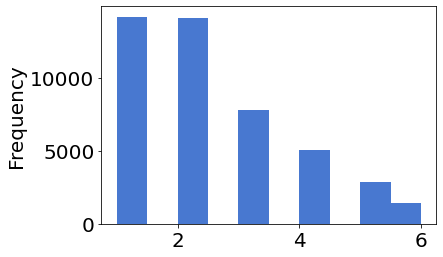

In [1988]:
train_df['age'].plot.hist(y='voted')
plt.show()

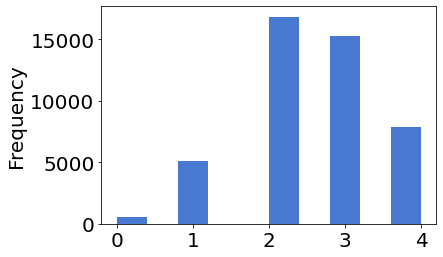

In [1989]:
train_df['education'].plot.hist(y='voted')
plt.show()

# engnat

In [1990]:
train_df['voted'].value_counts()

2    24898
1    20634
Name: voted, dtype: int64

In [1991]:
train_df['engnat'].value_counts().sort_index()

0       77
1    33024
2    12431
Name: engnat, dtype: int64

In [1992]:
(train_df[train_df['voted'] == 1]['engnat'].value_counts() / train_df['engnat'].value_counts()).sort_index()

0    0.376623
1    0.462603
2    0.428606
Name: engnat, dtype: float64

In [1993]:
(train_df[train_df['voted'] == 2]['engnat'].value_counts() / train_df['engnat'].value_counts()).sort_index()

0    0.623377
1    0.537397
2    0.571394
Name: engnat, dtype: float64

In [1994]:
train_df.loc[train_df['engnat'] == 2 ,'engnat'] = 0
test_df.loc[test_df['engnat'] == 2 ,'engnat'] = 0

In [1995]:
train_df = pd.concat([train_df, pd.get_dummies(train_df['engnat'], prefix='engnat')], axis=1, sort=False)
test_df = pd.concat([test_df, pd.get_dummies(test_df['engnat'], prefix='engnat')], axis=1, sort=False)

In [1996]:
train_df

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,...,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13,age,engnat_0,engnat_1
0,0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,...,1,1,0,1,0,1,1,3,0,1
1,1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,...,1,1,0,1,0,1,1,2,1,0
2,2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,...,1,1,1,1,0,1,1,3,0,1
3,3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,...,0,1,0,1,0,1,1,2,1,0
4,4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,...,1,1,0,1,1,1,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45527,45527,2.0,1050,5.0,619,4.0,328,1.0,285,1.0,...,1,1,1,1,0,1,1,1,0,1
45528,45528,2.0,581,3.0,1353,4.0,1164,1.0,798,3.0,...,1,1,1,1,0,1,1,3,0,1
45529,45529,4.0,593,1.0,857,1.0,1047,4.0,1515,5.0,...,1,1,0,1,0,1,1,1,0,1
45530,45530,1.0,747,3.0,1331,4.0,892,2.0,1281,1.0,...,1,1,1,1,0,1,1,4,0,1


# gender

In [1997]:
# train_df['gender'] = train_df['gender'].map({'Male':0, 'Female':1})

In [1998]:
train_df['gender'].value_counts()

Male      24217
Female    21315
Name: gender, dtype: int64

In [1999]:
(train_df[train_df['voted'] == 1]['gender'].value_counts() / train_df['gender'].value_counts()).sort_index()

Female    0.460427
Male      0.446794
Name: gender, dtype: float64

In [2000]:
(train_df[train_df['voted'] == 2]['gender'].value_counts() / train_df['gender'].value_counts()).sort_index()

Female    0.539573
Male      0.553206
Name: gender, dtype: float64

In [2001]:
train_df = pd.concat([train_df, pd.get_dummies(train_df['gender'], prefix='gender')], axis=1, sort=False)
test_df = pd.concat([test_df, pd.get_dummies(test_df['gender'], prefix='gender')], axis=1, sort=False)

In [2002]:
train_df

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,...,wr_09,wr_10,wr_11,wr_12,wr_13,age,engnat_0,engnat_1,gender_Female,gender_Male
0,0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,...,0,1,0,1,1,3,0,1,1,0
1,1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,...,0,1,0,1,1,2,1,0,1,0
2,2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,...,1,1,0,1,1,3,0,1,0,1
3,3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,...,0,1,0,1,1,2,1,0,1,0
4,4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,...,0,1,1,1,1,2,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45527,45527,2.0,1050,5.0,619,4.0,328,1.0,285,1.0,...,1,1,0,1,1,1,0,1,1,0
45528,45528,2.0,581,3.0,1353,4.0,1164,1.0,798,3.0,...,1,1,0,1,1,3,0,1,0,1
45529,45529,4.0,593,1.0,857,1.0,1047,4.0,1515,5.0,...,0,1,0,1,1,1,0,1,1,0
45530,45530,1.0,747,3.0,1331,4.0,892,2.0,1281,1.0,...,1,1,0,1,1,4,0,1,0,1


# race

In [2003]:
train_df['voted'].value_counts()

2    24898
1    20634
Name: voted, dtype: int64

In [2004]:
train_df['race'].value_counts().sort_index()

Arab                       351
Asian                     6834
Black                     2168
Indigenous Australian       53
Native American            548
Other                     4330
White                    31248
Name: race, dtype: int64

In [2005]:
(train_df[train_df['voted'] == 1]['race'].value_counts() / train_df['race'].value_counts()).sort_values()

Arab                     0.290598
Asian                    0.295435
Other                    0.377598
Black                    0.402214
Native American          0.412409
Indigenous Australian    0.452830
White                    0.504224
Name: race, dtype: float64

In [2006]:
(train_df[train_df['voted'] == 2]['race'].value_counts() / train_df['race'].value_counts()).sort_index()

Arab                     0.709402
Asian                    0.704565
Black                    0.597786
Indigenous Australian    0.547170
Native American          0.587591
Other                    0.622402
White                    0.495776
Name: race, dtype: float64

In [2007]:
race_dict = {'Arab':0, 'Asian':0, 'Black':1, 'Indigenous Australian':1, 'Native American':1, 'Other':2, 'White':3}

In [2008]:
train_df['race'] = train_df['race'].map(race_dict)
test_df['race'] = test_df['race'].map(race_dict)

In [2009]:
train_df = pd.concat([train_df, pd.get_dummies(train_df['race'], prefix='race')], axis=1, sort=False)
test_df = pd.concat([test_df, pd.get_dummies(test_df['race'], prefix='race')], axis=1, sort=False)

In [2010]:
train_df['race'].value_counts()

3    31248
0     7185
2     4330
1     2769
Name: race, dtype: int64

# religion

In [2011]:
train_df['voted'].value_counts()

2    24898
1    20634
Name: voted, dtype: int64

In [2012]:
train_df['religion'].value_counts()

Atheist                 10192
Agnostic                 9624
Christian_Catholic       6431
Christian_Other          5137
Christian_Protestant     4875
Other                    4770
Hindu                    1429
Muslim                   1192
Buddhist                  850
Jewish                    487
Christian_Mormon          428
Sikh                      117
Name: religion, dtype: int64

In [2013]:
list(set(train_df['religion']))

['Sikh',
 'Buddhist',
 'Agnostic',
 'Christian_Catholic',
 'Muslim',
 'Christian_Other',
 'Atheist',
 'Christian_Protestant',
 'Jewish',
 'Christian_Mormon',
 'Hindu',
 'Other']

In [2014]:
(train_df[train_df['voted'] == 1]['religion'].value_counts() / train_df['religion'].value_counts()).sort_values()

Muslim                  0.312919
Sikh                    0.358974
Buddhist                0.378824
Christian_Mormon        0.380841
Hindu                   0.386984
Other                   0.417191
Atheist                 0.427296
Agnostic                0.457398
Christian_Other         0.460385
Christian_Catholic      0.473488
Jewish                  0.550308
Christian_Protestant    0.565333
Name: religion, dtype: float64

In [2015]:
(train_df[train_df['voted'] == 2]['religion'].value_counts() / train_df['religion'].value_counts()).sort_index()

Agnostic                0.542602
Atheist                 0.572704
Buddhist                0.621176
Christian_Catholic      0.526512
Christian_Mormon        0.619159
Christian_Other         0.539615
Christian_Protestant    0.434667
Hindu                   0.613016
Jewish                  0.449692
Muslim                  0.687081
Other                   0.582809
Sikh                    0.641026
Name: religion, dtype: float64

In [2016]:
religion_dict = {
 'Muslim':0,
 'Sikh':0,
 'Buddhist':0,
 'Christian_Mormon':0,
 'Hindu':0,
 'Other':1,
 'Atheist':1,
 'Agnostic':2,
 'Christian_Other':3,
 'Christian_Catholic':3,
 'Christian_Protestant':4,
 'Jewish':4,
}

In [2017]:
train_df['religion'] = train_df['religion'].map(religion_dict)
test_df['religion'] = test_df['religion'].map(religion_dict)

In [2018]:
train_df = pd.concat([train_df, pd.get_dummies(train_df['religion'], prefix='religion')], axis=1, sort=False)
test_df = pd.concat([test_df, pd.get_dummies(test_df['religion'], prefix='religion')], axis=1, sort=False)

In [2019]:
train_df['religion'].value_counts()

1    14962
3    11568
2     9624
4     5362
0     4016
Name: religion, dtype: int64

# tp

In [2020]:
train_df['voted'].value_counts()

2    24898
1    20634
Name: voted, dtype: int64

In [2021]:
for i in range(1, 11):
    print(train_df['tp{:02d}'.format(i)].value_counts().sort_index())

0    4783
1    9014
2    7877
3    3692
4    5900
5    7942
6    6041
7     283
Name: tp01, dtype: int64
0     5438
1     9208
2    12498
3     3921
4     4198
5     5340
6     4614
7      315
Name: tp02, dtype: int64
0    11567
1    13488
2     8777
3     3483
4     4053
5     2515
6     1288
7      361
Name: tp03, dtype: int64
0     5437
1     6752
2    10189
3     3710
4     4754
5     7277
6     7078
7      335
Name: tp04, dtype: int64
0    15772
1    13681
2     8775
3     2750
4     2513
5     1243
6      507
7      291
Name: tp05, dtype: int64
0    8912
1    8640
2    9445
3    4126
4    4714
5    4664
6    4736
7     295
Name: tp06, dtype: int64
0     9811
1    11689
2     9914
3     4339
4     3968
5     3129
6     2345
7      337
Name: tp07, dtype: int64
0    3184
1    4861
2    9800
3    3965
4    5730
5    7939
6    9651
7     402
Name: tp08, dtype: int64
0     8799
1    10759
2     7869
3     5044
4     6328
5     3926
6     2521
7      286
Name: tp09, dtype: int64
0     1

In [2022]:
for i in range(1, 11):
    print((train_df[train_df['voted'] == 1]['tp{:02d}'.format(i)].value_counts() / train_df['tp{:02d}'.format(i)].value_counts()).sort_index())

0    0.486306
1    0.472598
2    0.443189
3    0.430661
4    0.453390
5    0.455805
6    0.421122
7    0.452297
Name: tp01, dtype: float64
0    0.423501
1    0.434622
2    0.445671
3    0.402193
4    0.469033
5    0.498127
6    0.524707
7    0.419048
Name: tp02, dtype: float64
0    0.506873
1    0.474867
2    0.423037
3    0.407120
4    0.405132
5    0.396819
6    0.352484
7    0.390582
Name: tp03, dtype: float64
0    0.372632
1    0.425800
2    0.457552
3    0.445283
4    0.473917
5    0.483304
6    0.497457
7    0.382090
Name: tp04, dtype: float64
0    0.468552
1    0.469410
2    0.430997
3    0.393091
4    0.438918
5    0.432824
6    0.378698
7    0.432990
Name: tp05, dtype: float64
0    0.412478
1    0.433449
2    0.452832
3    0.447891
4    0.475605
5    0.485635
6    0.519426
7    0.410169
Name: tp06, dtype: float64
0    0.507899
1    0.477543
2    0.448154
3    0.424983
4    0.414819
5    0.390221
6    0.330490
7    0.415430
Name: tp07, dtype: float64
0    0.353329
1    0.390455

In [2023]:
for i in range(1, 11):
    train_df.loc[train_df['tp{:02d}'.format(i)] < 4, 'tp{:02d}'.format(i)] = 0
    test_df.loc[test_df['tp{:02d}'.format(i)] < 4, 'tp{:02d}'.format(i)] = 0
    
    train_df.loc[train_df['tp{:02d}'.format(i)] >= 4, 'tp{:02d}'.format(i)] = 1
    test_df.loc[test_df['tp{:02d}'.format(i)] >= 4, 'tp{:02d}'.format(i)] = 1

for i in range(1, 11):
    train_df['tp{:02d}'.format(i)] = train_df['tp{:02d}'.format(i)] / 7
    test_df['tp{:02d}'.format(i)] = test_df['tp{:02d}'.format(i)] / 7

# familysize

In [2024]:
train_df['familysize'].value_counts().sort_index()

0              1217
1              6535
2             17918
3             11256
4              4907
5              1962
6               838
7               387
8               221
9               126
10               59
11               39
12               21
13               11
14                9
15                8
16                2
17                3
18                1
20                2
21                2
30                1
34                1
44                3
100               1
999               1
2147483647        1
Name: familysize, dtype: int64

In [2025]:
(train_df[train_df['voted'] == 1]['familysize'].value_counts() / train_df['familysize'].value_counts()).sort_index()

0             0.413311
1             0.424331
2             0.450106
3             0.456912
4             0.483391
5             0.481651
6             0.464200
7             0.519380
8             0.438914
9             0.476190
10            0.474576
11            0.564103
12            0.523810
13            0.636364
14            0.555556
15            0.625000
16                 NaN
17            1.000000
18                 NaN
20                 NaN
21            0.500000
30            1.000000
34                 NaN
44            0.333333
100           1.000000
999           1.000000
2147483647         NaN
Name: familysize, dtype: float64

In [2026]:
(train_df[train_df['voted'] == 2]['familysize'].value_counts() / train_df['familysize'].value_counts()).sort_index()

0             0.586689
1             0.575669
2             0.549894
3             0.543088
4             0.516609
5             0.518349
6             0.535800
7             0.480620
8             0.561086
9             0.523810
10            0.525424
11            0.435897
12            0.476190
13            0.363636
14            0.444444
15            0.375000
16            1.000000
17                 NaN
18            1.000000
20            1.000000
21            0.500000
30                 NaN
34            1.000000
44            0.666667
100                NaN
999                NaN
2147483647    1.000000
Name: familysize, dtype: float64

In [2027]:
train_df.loc[train_df['familysize'] > 4, 'familysize'] = 4
test_df.loc[test_df['familysize'] > 4, 'familysize'] = 4

In [2028]:
train_df['familysize'].value_counts().sort_index()

0     1217
1     6535
2    17918
3    11256
4     8606
Name: familysize, dtype: int64

In [2029]:
(train_df[train_df['voted'] == 1]['familysize'].value_counts() / train_df['familysize'].value_counts()).sort_index()

0    0.413311
1    0.424331
2    0.450106
3    0.456912
4    0.482222
Name: familysize, dtype: float64

In [2030]:
(train_df[train_df['voted'] == 2]['familysize'].value_counts() / train_df['familysize'].value_counts()).sort_index()

0    0.586689
1    0.575669
2    0.549894
3    0.543088
4    0.517778
Name: familysize, dtype: float64

In [2031]:
train_df['familysize'] = train_df['familysize'] / 6
test_df['familysize'] = test_df['familysize'] / 6

# married

In [2032]:
train_df['voted'].value_counts()

2    24898
1    20634
Name: voted, dtype: int64

In [2033]:
train_df['married'].value_counts().sort_index()

0       93
1    31550
2    10059
3     3830
Name: married, dtype: int64

In [2034]:
(train_df[train_df['voted'] == 1]['married'].value_counts() / train_df['married'].value_counts()).sort_index()

0    0.322581
1    0.370428
2    0.666567
3    0.577546
Name: married, dtype: float64

In [2035]:
(train_df[train_df['voted'] == 2]['married'].value_counts() / train_df['married'].value_counts()).sort_index()

0    0.677419
1    0.629572
2    0.333433
3    0.422454
Name: married, dtype: float64

In [2036]:
train_df.loc[train_df['married'] == 0,'married'] = 1
test_df.loc[test_df['married'] == 0,'married'] = 1

In [2037]:
train_df.loc[train_df['married'] == 3,'married'] = 2
test_df.loc[test_df['married'] == 3,'married'] = 2

In [2038]:
train_df['married'] = train_df['married'] - 1
test_df['married'] = test_df['married'] - 1

In [2039]:
train_df['married'].value_counts()

0    31643
1    13889
Name: married, dtype: int64

In [2040]:
train_df = pd.concat([train_df, pd.get_dummies(train_df['married'], prefix='married')], axis=1, sort=False)
test_df = pd.concat([test_df, pd.get_dummies(test_df['married'], prefix='married')], axis=1, sort=False)

In [2041]:
train_df

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,...,race_1,race_2,race_3,religion_0,religion_1,religion_2,religion_3,religion_4,married_0,married_1
0,0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,...,0,0,1,0,1,0,0,0,0,1
1,1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,...,0,0,0,1,0,0,0,0,1,0
2,2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,...,0,0,1,0,1,0,0,0,0,1
3,3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,...,0,0,0,1,0,0,0,0,1,0
4,4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45527,45527,2.0,1050,5.0,619,4.0,328,1.0,285,1.0,...,0,0,1,0,0,0,0,1,1,0
45528,45528,2.0,581,3.0,1353,4.0,1164,1.0,798,3.0,...,0,0,1,0,1,0,0,0,1,0
45529,45529,4.0,593,1.0,857,1.0,1047,4.0,1515,5.0,...,0,0,1,0,0,0,1,0,1,0
45530,45530,1.0,747,3.0,1331,4.0,892,2.0,1281,1.0,...,0,0,1,0,1,0,0,0,1,0


# hand

In [2042]:
train_df['voted'].value_counts()

2    24898
1    20634
Name: voted, dtype: int64

In [2043]:
train_df['hand'].value_counts().sort_index()

0      161
1    39058
2     4692
3     1621
Name: hand, dtype: int64

In [2044]:
(train_df[train_df['voted'] == 1]['hand'].value_counts() / train_df['hand'].value_counts()).sort_index()

0    0.366460
1    0.454683
2    0.459506
3    0.407156
Name: hand, dtype: float64

In [2045]:
(train_df[train_df['voted'] == 2]['hand'].value_counts() / train_df['hand'].value_counts()).sort_index()

0    0.633540
1    0.545317
2    0.540494
3    0.592844
Name: hand, dtype: float64

In [2046]:
train_df.loc[train_df['hand'] == 3, 'hand'] = 0
test_df.loc[test_df['hand'] == 3, 'hand'] = 0

In [2047]:
train_df = pd.concat([train_df, pd.get_dummies(train_df['hand'], prefix='hand')], axis=1, sort=False)
test_df = pd.concat([test_df, pd.get_dummies(test_df['hand'], prefix='hand')], axis=1, sort=False)

# education

In [2048]:
train_df['voted'].value_counts()

2    24898
1    20634
Name: voted, dtype: int64

In [2049]:
train_df['education'].value_counts()

2    16835
3    15227
4     7854
1     5088
0      528
Name: education, dtype: int64

In [2050]:
(train_df[train_df['voted'] == 1]['education'].value_counts() / train_df['education'].value_counts()).sort_index()

0    0.477273
1    0.049725
2    0.367033
3    0.596506
4    0.619684
Name: education, dtype: float64

In [2051]:
(train_df[train_df['voted'] == 2]['education'].value_counts() / train_df['education'].value_counts()).sort_index()

0    0.522727
1    0.950275
2    0.632967
3    0.403494
4    0.380316
Name: education, dtype: float64

In [2052]:
train_df.loc[train_df['education']==0, 'education'] = 3
test_df.loc[test_df['education']==0, 'education'] = 3

In [2053]:
train_df = pd.concat([train_df, pd.get_dummies(train_df['education'], prefix='education')], axis=1, sort=False)
test_df = pd.concat([test_df, pd.get_dummies(test_df['education'], prefix='education')], axis=1, sort=False)

In [2054]:
# train_df['education'] = (train_df['education'] - 1) / 3
# test_df['education'] = (test_df['education'] - 1) / 3

# urban

In [2055]:
train_df['urban'].value_counts().sort_index()

0      322
1     8909
2    18534
3    17767
Name: urban, dtype: int64

In [2056]:
(train_df[train_df['voted'] == 1]['urban'].value_counts() / train_df['urban'].value_counts()).sort_index()

0    0.509317
1    0.507128
2    0.458455
3    0.419598
Name: urban, dtype: float64

In [2057]:
(train_df[train_df['voted'] == 2]['urban'].value_counts() / train_df['urban'].value_counts()).sort_index()

0    0.490683
1    0.492872
2    0.541545
3    0.580402
Name: urban, dtype: float64

In [2058]:
train_df[train_df['urban'] == 0] = 1
test_df[test_df['urban'] == 0] = 1

In [2059]:
train_df = pd.concat([train_df, pd.get_dummies(train_df['urban'], prefix='urban')], axis=1, sort=False)
test_df = pd.concat([test_df, pd.get_dummies(test_df['urban'], prefix='urban')], axis=1, sort=False)

# split_data

In [2060]:
train_df['voted'].value_counts()

2    24740
1    20792
Name: voted, dtype: int64

In [2061]:
train_df

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,...,hand_0,hand_1,hand_2,education_1,education_2,education_3,education_4,urban_1,urban_2,urban_3
0,0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,...,0,1,0,0,1,0,0,1,0,0
1,1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,...,0,1,0,0,0,0,1,0,0,1
2,2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,...,0,1,0,0,0,1,0,0,1,0
3,3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,...,0,1,0,0,0,0,1,0,0,1
4,4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45527,45527,2.0,1050,5.0,619,4.0,328,1.0,285,1.0,...,1,0,0,0,1,0,0,0,0,1
45528,45528,2.0,581,3.0,1353,4.0,1164,1.0,798,3.0,...,0,1,0,0,1,0,0,1,0,0
45529,45529,4.0,593,1.0,857,1.0,1047,4.0,1515,5.0,...,0,1,0,0,1,0,0,0,1,0
45530,1,1.0,1,1.0,1,1.0,1,1.0,1,1.0,...,1,1,1,1,1,1,1,1,0,0


In [2062]:
train_df.columns.to_numpy()

array(['index', 'QaA', 'QaE', 'QbA', 'QbE', 'QcA', 'QcE', 'QdA', 'QdE',
       'QeA', 'QeE', 'QfA', 'QfE', 'QgA', 'QgE', 'QhA', 'QhE', 'QiA',
       'QiE', 'QjA', 'QjE', 'QkA', 'QkE', 'QlA', 'QlE', 'QmA', 'QmE',
       'QnA', 'QnE', 'QoA', 'QoE', 'QpA', 'QpE', 'QqA', 'QqE', 'QrA',
       'QrE', 'QsA', 'QsE', 'QtA', 'QtE', 'age_group', 'education',
       'engnat', 'familysize', 'gender', 'hand', 'married', 'race',
       'religion', 'tp01', 'tp02', 'tp03', 'tp04', 'tp05', 'tp06', 'tp07',
       'tp08', 'tp09', 'tp10', 'urban', 'voted', 'wf_01', 'wf_02',
       'wf_03', 'wr_01', 'wr_02', 'wr_03', 'wr_04', 'wr_05', 'wr_06',
       'wr_07', 'wr_08', 'wr_09', 'wr_10', 'wr_11', 'wr_12', 'wr_13',
       'age', 'engnat_0', 'engnat_1', 'gender_Female', 'gender_Male',
       'race_0', 'race_1', 'race_2', 'race_3', 'religion_0', 'religion_1',
       'religion_2', 'religion_3', 'religion_4', 'married_0', 'married_1',
       'hand_0', 'hand_1', 'hand_2', 'education_1', 'education_2',
       'educa

In [2063]:
from sklearn.model_selection import train_test_split

In [2146]:
train_x_df = train_df[[
#        'QaA', 'QbA', 'QcA', 'QdA', 'QeA',
#        'QfA', 'QgA', 'QhA', 'QiA', 'QjA',
#        'QkA', 'QlA', 'QmA', 'QnA','QoA',
#        'QpA', 'QqA', 'QrA', 'QsA', 'QtA',
#        'QaE', 'QbE', 'QcE', 'QdE', 'QeE', 
#        'QfE', 'QgE', 'QhE', 'QiE', 'QjE', 
#        'QkE', 'QlE', 'QmE', 'QnE', 'QoE', 
#        'QpE', 'QqE', 'QrE', 'QsE', 'QtE', 
       'age', #'education', 
       'engnat_0', 'engnat_1', 'familysize', 'gender_Male', 'gender_Female', 
#        'hand_0', 'hand_1', 'hand_2', 
       'married_0', 'married_1', #'married_2', 
       'race_0', 'race_1', 'race_2', 'race_3', #'race_4', 
       'religion_0', 'religion_1', 'religion_2', 'religion_3', 'religion_4', 
       'tp01', 'tp02', 'tp03', 'tp04',
       'tp05', 'tp06', 'tp07', 'tp08', 'tp09', 'tp10', 
       'urban_1', 'urban_2', 'urban_3', 
       'education_1', 'education_2', 'education_3', 'education_4',
       'wf_01', 'wf_02', 'wf_03', 'wr_01', 'wr_02', 'wr_03', 'wr_04', 'wr_05',
       'wr_06', 'wr_07', 'wr_08', 'wr_09', 'wr_10', 'wr_11', 'wr_12', 'wr_13',
                      ]]

In [2147]:
submission_x_df = test_df[[
#        'QaA', 'QbA', 'QcA', 'QdA', 'QeA',
#        'QfA', 'QgA', 'QhA', 'QiA', 'QjA',
#        'QkA', 'QlA', 'QmA', 'QnA','QoA',
#        'QpA', 'QqA', 'QrA', 'QsA', 'QtA',
#        'QaE', 'QbE', 'QcE', 'QdE', 'QeE', 
#        'QfE', 'QgE', 'QhE', 'QiE', 'QjE', 
#        'QkE', 'QlE', 'QmE', 'QnE', 'QoE', 
#        'QpE', 'QqE', 'QrE', 'QsE', 'QtE', 
       'age', #'education', 
       'engnat_0', 'engnat_1', 'familysize', 'gender_Male', 'gender_Female', 
#        'hand_0', 'hand_1', 'hand_2', 
       'married_0', 'married_1', #'married_2', 
       'race_0', 'race_1', 'race_2', 'race_3', #'race_4', 
       'religion_0', 'religion_1', 'religion_2', 'religion_3', 'religion_4', 
       'tp01', 'tp02', 'tp03', 'tp04',
       'tp05', 'tp06', 'tp07', 'tp08', 'tp09', 'tp10', 
       'urban_1', 'urban_2', 'urban_3', 
       'education_1', 'education_2', 'education_3', 'education_4',
       'wf_01', 'wf_02', 'wf_03', 'wr_01', 'wr_02', 'wr_03', 'wr_04', 'wr_05',
       'wr_06', 'wr_07', 'wr_08', 'wr_09', 'wr_10', 'wr_11', 'wr_12', 'wr_13',
                      ]]

In [2148]:
train_y_df = train_df[['voted']] - 1

In [2149]:
train_y_df['voted'].value_counts()

1    24740
0    20792
Name: voted, dtype: int64

In [2150]:
train_x, test_x, train_y, test_y = train_test_split(train_x_df, train_y_df, test_size=0.2, random_state=42)

In [2151]:
train_ds = lgb.Dataset(train_x, label = train_y) 
test_ds = lgb.Dataset(test_x, label = test_y) 

# train model

## random forest

In [2228]:
params = {'learning_rate': 0.01, 
          'max_depth': -1, 
          'boosting': 'rf', 
          'objective': 'binary', 
          'metric': 'binary_logloss', 
          'is_training_metric': True, 
          'num_leaves': 212, 
          'feature_fraction': 0.8,
          'bagging_fraction': 0.8, 
          'bagging_freq': 3, 
          'seed':2020}

In [2229]:
rf_model = lgb.train(params, train_ds, 1000, test_ds, verbose_eval=100, early_stopping_rounds=100)

[LightGBM] [Info] Number of positive: 19825, number of negative: 16600
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011072 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 109
[LightGBM] [Info] Number of data points in the train set: 36425, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.544269 -> initscore=0.177541
[LightGBM] [Info] Start training from score 0.177541
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.563951
[200]	valid_0's binary_logloss: 0.563601
Early stopping, best iteration is:
[178]	valid_0's binary_logloss: 0.563471


In [2230]:
predict_test_rf = rf_model.predict(test_x)

In [2231]:
roc_auc_score(test_y['voted'], predict_test_rf)

0.7742007495748332

In [2232]:
roc_auc_score(test_y['voted'], predict_test_rf)

0.7742007495748332

In [976]:
roc_auc_score(test_y['voted'], predict_test_rf)

0.773791720702321

## gbdt

In [2309]:
params = {'learning_rate': 0.01, 
          'max_depth': -1, 
          'boosting': 'gbdt', 
          'objective': 'binary', 
          'metric': 'binary_logloss', 
          'is_training_metric': True, 
          'num_leaves': 56, 
          'feature_fraction': 0.8, 
          'bagging_fraction': 0.8, 
          'bagging_freq': 15, 
          'seed':2020}

In [2310]:
gbdt_model = lgb.train(params, train_ds, 2000, test_ds, verbose_eval=100, early_stopping_rounds=100)

[LightGBM] [Info] Number of positive: 19825, number of negative: 16600
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012312 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 109
[LightGBM] [Info] Number of data points in the train set: 36425, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.544269 -> initscore=0.177541
[LightGBM] [Info] Start training from score 0.177541
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.58381
[200]	valid_0's binary_logloss: 0.559604
[300]	valid_0's binary_logloss: 0.553068
[400]	valid_0's binary_logloss: 0.551138
[500]	valid_0's binary_logloss: 0.550569
[600]	valid_0's binary_logloss: 0.550139
[700]	valid_0's binary_logloss: 0.549991
Early stopping, best iteration is:
[674]	valid_0's binary_logloss: 0.549926


In [2311]:
predict_test_gbdt = gbdt_model.predict(test_x)

In [2312]:
roc_auc_score(test_y['voted'], predict_test_gbdt)

0.7765879930187229

In [2296]:
roc_auc_score(test_y['voted'], predict_test_gbdt)

0.7765879930187229

## goss

In [2341]:
params = {'learning_rate': 0.01, 
          'max_depth': -1, 
          'boosting': 'goss', 
          'objective': 'binary', 
          'metric': 'binary_logloss', 
          'is_training_metric': True, 
          'num_leaves': 36, 
          'feature_fraction': 0.7, 
#           'bagging_fraction': 0.6, 
#           'bagging_freq': 5, 
          'seed':2020}

In [2342]:
goss_model = lgb.train(params, train_ds, 2000, test_ds, verbose_eval=100, early_stopping_rounds=100)

[LightGBM] [Info] Number of positive: 19825, number of negative: 16600
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008632 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 109
[LightGBM] [Info] Number of data points in the train set: 36425, number of used features: 50
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.544269 -> initscore=0.177541
[LightGBM] [Info] Start training from score 0.177541
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.586234
[200]	valid_0's binary_logloss: 0.562144
[300]	valid_0's binary_logloss: 0.55513
[400]	valid_0's binary_logloss: 0.552682
[500]	valid_0's binary_logloss: 0.551523
[600]	valid_0's binary_logloss: 0.551103
[700]	valid_0's binary_logloss: 0.551101
Early stopping, best iteration is:
[645]	valid_0's binary_logloss

In [2343]:
predict_test_goss = goss_model.predict(test_x)

In [2344]:
roc_auc_score(test_y['voted'], predict_test_goss)

0.7754436343410498

In [2324]:
roc_auc_score(test_y['voted'], predict_test_goss)

0.7754436343410498

In [656]:
roc_auc_score(test_y['voted'], predict_test_goss)

0.7742410093730829

## dart

In [2382]:
params = {'learning_rate': 0.01, 
          'max_depth': -1, 
          'boosting': 'dart', 
          'objective': 'binary', 
          'metric': 'mse', 
          'is_training_metric': True, 
          'num_leaves': 72, 
          'feature_fraction': 0.8,
          'bagging_fraction': 0.7, 
          'bagging_freq': 5, 
          'seed':2020}

In [2383]:
dart_model = lgb.train(params, train_ds, 1000, test_ds, verbose_eval=100, early_stopping_rounds=100)

[LightGBM] [Info] Number of positive: 19825, number of negative: 16600
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014155 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 109
[LightGBM] [Info] Number of data points in the train set: 36425, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.544269 -> initscore=0.177541
[LightGBM] [Info] Start training from score 0.177541


/Users/jeongsuchan/opt/anaconda3/envs/my_env/lib/python3.6/site-packages/lightgbm/callback.py:186: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid_0's l2: 0.215409
[200]	valid_0's l2: 0.209926
[300]	valid_0's l2: 0.203417
[400]	valid_0's l2: 0.199239
[500]	valid_0's l2: 0.196202
[600]	valid_0's l2: 0.193614
[700]	valid_0's l2: 0.19275
[800]	valid_0's l2: 0.191807
[900]	valid_0's l2: 0.191206
[1000]	valid_0's l2: 0.190678


In [2384]:
predict_test_dart = dart_model.predict(test_x)

In [2385]:
roc_auc_score(test_y['voted'], predict_test_dart)

0.775261288274716

In [2381]:
roc_auc_score(test_y['voted'], predict_test_dart)

0.7748479155180046

In [1470]:
roc_auc_score(test_y['voted'], predict_test_dart)

0.7756716518602502

In [1462]:
roc_auc_score(test_y['voted'], predict_test_dart)

0.7758938937121912

# dense model

In [2386]:
import os
os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"
os.environ["RUNFILES_DIR"] = "/Library/Frameworks/Python.framework/Versions/3.6/share/plaidml"
os.environ["PLAIDML_NATIVE_PATH"] = "/Library/Frameworks/Python.framework/Versions/3.6/lib/libplaidml.dylib"

In [2387]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Activation, Conv1D, Conv2D, Flatten, MaxPooling1D, LSTM, BatchNormalization, Dropout, GlobalAveragePooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.metrics import binary_crossentropy

In [2388]:
tensorflow.keras.__version__

'2.3.0-tf'

In [2389]:
len(train_x.columns)

50

In [2390]:
model = tf.keras.Sequential([
#     Conv1D(32, 1, activation='relu', input_shape=(1, 74)),
#     Conv1D(64, 1, activation='relu'),
#     Conv1D(128, 1, activation='relu'),
    Conv1D(256, 1, activation='relu', input_shape=(1, 50)),
    Conv1D(512, 1, activation='relu'),
    Conv1D(1024, 1, activation='relu'),
#     Conv1D(2048, 1, activation='relu'),
#     Conv1D(4096, 1, activation='relu', data_format='channels_first'),

#     Conv1D(256, 1, activation='relu', input_shape=(82, 1)),
#     Conv1D(512, 1, activation='relu'),
#     Conv1D(1024, 1, activation='relu'),
#     Conv1D(2048, 1, activation='relu'),

    
    Flatten(),
    
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [2391]:
opt = tf.keras.optimizers.Adam(lr=0.00005)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=[tf.keras.metrics.AUC(name='AUC')])

In [2392]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_51 (Conv1D)           (None, 1, 256)            13056     
_________________________________________________________________
conv1d_52 (Conv1D)           (None, 1, 512)            131584    
_________________________________________________________________
conv1d_53 (Conv1D)           (None, 1, 1024)           525312    
_________________________________________________________________
flatten_15 (Flatten)         (None, 1024)              0         
_________________________________________________________________
dense_23 (Dense)             (None, 128)               131200    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 1)               

In [2393]:
import keras
import sklearn

class DataGenerator(tf.keras.utils.Sequence):
    'Generates data for Keras'
    def __init__(self, train_x, train_y, batch_size):
        
        self.train_x = np.array_split(train_x.to_numpy()[:,np.newaxis], len(train_x) // batch_size)
        self.train_y = np.array_split(train_y.to_numpy(), len(train_y) // batch_size)
        
    def __len__(self):
        'Denotes the number of batches per epoch'
        return len(self.train_x)

    def __getitem__(self, index):
        return self.train_x[index], self.train_y[index]

In [2397]:
BATCH_SIZE = 128
train_generator = DataGenerator(train_x, train_y, BATCH_SIZE)
test_generator = DataGenerator(test_x, test_y, BATCH_SIZE)

In [2398]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stop = EarlyStopping(monitor='val_AUC', patience=10, mode='max', verbose=1)
checkpoint = ModelCheckpoint('model_best_weights_32.h5', monitor='val_AUC', verbose=1, save_best_only=True, mode='max', period=1)

In [2399]:
model.fit_generator(generator=train_generator, validation_data=test_generator, epochs=100, shuffle=True, callbacks=[early_stop, checkpoint])

Epoch 1/100
284/284 [==============================] - ETA: 0s - loss: 0.5823 - AUC: 0.7481
Epoch 00001: val_AUC improved from -inf to 0.75831, saving model to model_best_weights_32.h5
284/284 [==============================] - 26s 91ms/step - loss: 0.5823 - AUC: 0.7481 - val_loss: 0.5699 - val_AUC: 0.7583
Epoch 2/100
284/284 [==============================] - ETA: 0s - loss: 0.5694 - AUC: 0.7561
Epoch 00002: val_AUC improved from 0.75831 to 0.76312, saving model to model_best_weights_32.h5
284/284 [==============================] - 26s 92ms/step - loss: 0.5694 - AUC: 0.7561 - val_loss: 0.5633 - val_AUC: 0.7631
Epoch 3/100
284/284 [==============================] - ETA: 0s - loss: 0.5630 - AUC: 0.7622
Epoch 00003: val_AUC improved from 0.76312 to 0.76558, saving model to model_best_weights_32.h5
284/284 [==============================] - 27s 94ms/step - loss: 0.5630 - AUC: 0.7622 - val_loss: 0.5597 - val_AUC: 0.7656
Epoch 4/100
284/284 [==============================] - ETA: 0s - loss:

In [2400]:
model.load_weights('model_best_weights_32.h5')

In [2401]:
predict_keras = model.predict(test_x.to_numpy()[:,np.newaxis])

In [2402]:
roc_auc_score(test_y.to_numpy(), predict_keras)

0.7726036805075598

In [2403]:
predict_keras.shape

(9107, 1)

# ensemble

In [332]:
predict_test = predict_test_rf * 0.2 + predict_test_gbdt * 0.2 + predict_test_goss * 0.3 + predict_test_dart * 0.3

In [2408]:
predict_test = (predict_test_rf + predict_test_gbdt + predict_test_goss + predict_test_dart + predict_keras[:,0]) / 5

In [2410]:
predict_test = (predict_test_rf + predict_test_gbdt + predict_test_goss + predict_test_dart) / 4

In [309]:
predict_test = (predict_test_gbdt + predict_test_dart) / 2

In [2409]:
roc_auc_score(test_y['voted'], predict_test)

0.7766228896973746

In [2411]:
roc_auc_score(test_y['voted'], predict_test)

0.7763370669705607

In [312]:
roc_auc_score(test_y['voted'], predict_test)

0.7736621322016262

# submission

In [1515]:
submission_rf = rf_model.predict(submission_x_df)

In [1516]:
submission_gbdt = gbdt_model.predict(submission_x_df)

In [1517]:
submission_goss = goss_model.predict(submission_x_df)

In [1518]:
submission_dart = dart_model.predict(submission_x_df)

In [1519]:
submission_keras = model.predict(submission_x_df.to_numpy()[:,np.newaxis])

In [1520]:
submission_result = (submission_rf + submission_gbdt + submission_goss + submission_dart + submission_keras)/5 + 1

In [1513]:
submission_result = (submission_rf + submission_gbdt + submission_goss + submission_dart)/4 + 1

In [1521]:
submission_result

array([[1.69863076, 1.86745092, 1.48017851, ..., 1.42419902, 1.51889121,
        1.66354647],
       [1.69527632, 1.86409647, 1.47682407, ..., 1.42084458, 1.51553677,
        1.66019203],
       [1.60246584, 1.771286  , 1.38401359, ..., 1.32803411, 1.42272629,
        1.56738156],
       ...,
       [1.58633383, 1.75515398, 1.36788158, ..., 1.31190209, 1.40659428,
        1.55124954],
       [1.60732409, 1.77614424, 1.38887184, ..., 1.33289235, 1.42758454,
        1.5722398 ],
       [1.67564963, 1.84446979, 1.45719738, ..., 1.40121789, 1.49591008,
        1.64056534]])

In [1522]:
sample_submission_df = pd.read_csv('data/sample_submission.csv')

In [1523]:
sample_submission_df

,index,voted
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
11378,11378,0
11379,11379,0
11380,11380,0
11381,11381,0


In [1524]:
sample_submission_df['voted'] = submission_result

In [1525]:
sample_submission_df

,index,voted
0,0,1.698631
1,1,1.695276
2,2,1.602466
3,3,1.574288
4,4,1.695666
...,...,...
11378,11378,1.528715
11379,11379,1.719351
11380,11380,1.586334
11381,11381,1.607324


In [1526]:
sample_submission_df.to_csv('data/submission.csv', index=False)